## Imports

In [19]:
import numpy as np
import matplotlib.pyplot as plt

import time
from numba import njit
from pyccel.epyccel import epyccel
from pyccel.decorators import types

## Pure python function

In [20]:
def solve_1d_nonlinearconv_pure(u, un, nt, nx, dt, dx):

    #fill the update of u
    for i in range(nt):
        for j in range(1,nx):
            u[j]=u[j]-u[i]*(dt/dx)*(u[j]-u[j-1])
    
    return 0

## Numba accelerator

In [21]:
@njit(fastmath=True)
def solve_1d_nonlinearconv_numba(u, un, nt, nx, dt, dx):

    #fill the update of u
    for i in range(nt):
        for j in range(1,nx):
            u[j]=u[j]-u[i]*(dt/dx)*(u[j]-u[j-1])
    
    return 0

## Pyccel accelerator

In [22]:
@types('float[:]','float[:]', 'int', 'int','float', 'float')
def solve_1d_nonlinearconv_pyccel(u, un, nt, nx, dt, dx):

    #fill the update of u
    for i in range(nt):
        for j in range(1,nx):
            u[j]=u[j]-u[i]*(dt/dx)*(u[j]-u[j-1])
    
    return 0

## Inputs

Text(0.5, 1.0, '1D Linear Convection')

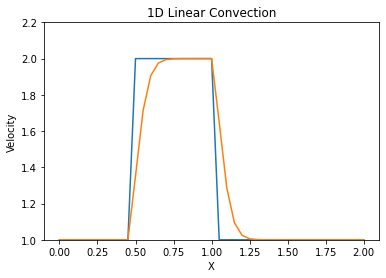

In [23]:
nx = 41  # try changing this number from 41 to 81 and Run All ... what happens?
dx = 2 / (nx-1)
nt = 40  #nt is the number of timesteps we want to calculate
dt = 0.001
grid = np.linspace(0,2,nx) # creating the space grid    

u0 = np.ones(nx)      #numpy function ones()
u0[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
plt.plot(grid,u0)
u = u0.copy()
un = np.ones(nx)

solve_1d_nonlinearconv_pure(u, un, nt, nx, dt, dx)
#Plotting data
plt.plot(grid,u);
plt.ylim([1.,2.2])
plt.xlabel('X')
plt.ylabel('Velocity')    
plt.title('1D Linear Convection')

## Call Funtions

### Pure function

In [24]:
%timeit solve_1d_nonlinearconv_pure(u, un, nt, nx, dt, dx)

1.87 ms ± 119 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Function with numba accelerator

In [25]:
%timeit solve_1d_nonlinearconv_numba(u, un, nt, nx, dt, dx)

14.8 µs ± 4.15 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Function with pyccel accelerator

In [26]:
solve_1d_nonlinearconv_f90 = epyccel(solve_1d_nonlinearconv_pyccel)

In [27]:
%timeit solve_1d_nonlinearconv_f90(u, un, nt, nx, dt, dx)

5.36 µs ± 101 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
